## 3.2.2.1 Dataset in Google Cloud

**_Project Name_**:  BRLDI-GCPCapabilities AI Audit   
**_Project ID_**:  brldi-gcpcapabilities-ai-audit  
**_Bucket name_**:  bucketdemo2blackfridaysales  

The training dataset resides here:  **gs://bucketdemo2blackfridaysales/train.csv**  
The test dataset resides here:  **gs://bucketdemo2blackfridaysales/test.csv**

## 3.2.3.1 Business goal and machine learning solution

**_Historical Context_**  
The black friday dataset was first introduced in a hackathon conducted online. Due to its unpredictable nature, it has become popular. Data Scientists mainly use this dataset to perform feature engineering and test their skills at improving their model's accuracy. The secretive nature of the features has lead to many assumptions, which only makes the problem solving more interesting.  

**_The business goal being addressed here_**  
The business goal being addressed here is the prediction of the purchase amount of customers during black friday sales based off of their demographic aspects and product category preferences. Businesses will try to leverage these predictions to manage their inventories and to carefully cater to specific needs and niches.  

**_The machine learning use case_**  
In the data analysis pipeline, Exploratory Data Analysis (EDA) offers valuable insights into customer preferences and the influence of demographic attributes on purchasing decisions, aiding in feature selection. Subsequently, data preprocessing is crucial to ensure the dataset is suitably prepared for model training, directly impacting model accuracy. Feature selection follows, where key predictors identified during EDA are chosen to streamline model complexity, aiming for both effectiveness and computational efficiency. Model selection is pivotal, ensuring the chosen model can capture underlying patterns effectively. Hyperparameter tuning fine-tunes model performance, adjusting parameters to align with the dataset's characteristics. Finally, model training entails exposing the model to the dataset for sufficient epochs to comprehend underlying patterns comprehensively. This sequential approach optimizes the analytical process, culminating in robust predictive models. 

**_How the machine learning solution is expected to address the business goal_**  
The model's training-driven predictions will serve businesses with insights that can be employed in inventory management, to construct smart marketing campaigns, to cater to customer needs, and to fathom product category preferences to come up with newer and radical products. Ultimately, 

## 3.2.3.2 Data exploration 

**_How and what type of data exploration was performed_**  

The programming language used here is Python.
We have used the following libraries to perform Exploratory Data Analysis
- pandas  
- numpy  
- seaborn  
- matplotlib   

#### Understanding the data distribution of the target variable  
The data distribution of the target variable was studied to analyse its skewness. The distribution turned out to be positively skewed implying that there were a few purchases that were fancier than the other ones. This inference birthed the assumption that pricier product categories during sales were fancied more than usual which lead to a few extravagant purchases. The large purchases could also have been due to those customers' financial statuses. Deeper insights will be generated in the successive steps.  

In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import seaborn as sns

In [15]:
black_friday_dataset = pd.read_csv("train.csv")
black_friday_dataset.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


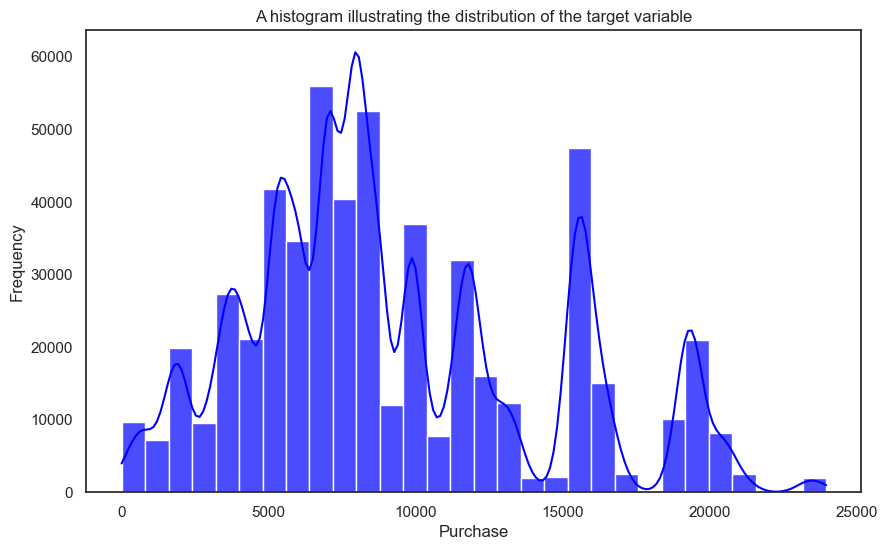

In [16]:
# Illustrating the skewed nature of the target variable with statistical evidence
sns.set_theme(style="white", rc={"axes.facecolor": "white", "figure.facecolor": "white"})
plt.figure(figsize=(10,6))
sns.histplot(black_friday_dataset['Purchase'], bins=30, kde=True, color='blue', alpha=0.7)
plt.title('A histogram illustrating the distribution of the target variable')
plt.xlabel('Purchase')
plt.ylabel('Frequency')
plt.show()

**Key Insights**

_Histogram Analysis_: A histogram is utilized to visualize the distribution of the 'Purchase' variable, offering insights into its spread and skewness across different values.

_Popular Price Range_: Majority of purchases are within the 5000-10000 range, indicating the popularity of products within this price bracket.

_High-Value Purchases_: A spike in the 15000-18000 range suggests a significant number of high-value purchases, highlighting a segment of customers willing to invest in premium products.

_Less Popular High-End Products_: A smaller spike near the 20000 price point indicates lower customer interest in products at this price, suggesting a potential need for reassessment of value propositions or promotional strategies.

_Pricing Strategy Insights_: Understanding these price points aids in setting pricing strategies, such as introducing more products in the 5000-10000 range while offering premium options in the 15000-18000 range.

_Preprocessing Implications_: The skewed nature of the target variable necessitates preprocessing techniques like log transformation or binning to enhance model performance. Outlier detection and removal may also be necessary.

_Decision Impact_: Insights from the distribution analysis inform decisions in predictive modeling and business strategies, optimizing revenue generation, marketing campaigns, and inventory management to improve customer satisfaction.

### Statistical Analysis
- The objective of these statistical tests was to possess statistical evidences that can back our findings across other analyses  
- One-way Anova test was performed to study the impact of the categorical variable 'Gender' on the numerical target variable 'Purchase'.  
- It concluded that the groups 'M' and 'F' in Gender indeed didn't have identical means.
- This implied that businesses will have to cater specifically to the needs of these groups.  
- To dig deeper into the impact of Gender and Marital Status on purchasing decisions, we performed two-way Anova.  
- The inference from that was Gender and Marital Status combined had an influence on purchasing decisions.  
- We also learnt that 'Gender' and 'Marital Status' could potentially be important predictors.   

In [34]:
# Comparing if the means of two the groups in the Gender variable namely, 'M' and 'F' are identical
from scipy.stats import f_oneway
result = f_oneway(black_friday_dataset['Purchase'][black_friday_dataset['Gender'] == 'M'],
                   black_friday_dataset['Purchase'][black_friday_dataset['Gender'] == 'F'])
print('The F-statistic is: {}'.format(result.statistic), end = '\n\n')
print('The p-value is: {}'.format(result.pvalue))

The F-statistic is: 2010.4424717228953

The p-value is: 0.0


- The null hypothesis of an Anova test is that the means of the independent groups are identical
- In our case, we will begin by assuming that mean purchase amounts of Males and Females is identical
- If we evaluate against an industry standard significance level of 0.05, we have sufficient evidence to disprove the null hypothesis
- It implies that under the assumption that the null hypothesis holds, the probability (p-value) of getting a sample dataset as adeverse if not more is zero
- This essentially means that the results from the tests are not due to random chance.
- We have discovered that the mean purchase of Male and Female don't correspond
- This indicates that either one of the gender was more active during the sales
- This information can be leverage to cater more to that gender by offering discounts on product categories they likely prefer.  

In [35]:
# Let us compare Gender and Marital Status against the target variable Purchase
 
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
formula = 'Purchase ~ C(Gender) + C(Marital_Status) + C(Gender):C(Marital_Status)'
model = ols(formula, data=black_friday_dataset).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                                   sum_sq        df            F        PR(>F)
C(Gender)                    5.053901e+10       1.0  2010.452537  0.000000e+00
C(Marital_Status)            7.785081e+05       1.0     0.030969  8.603092e-01
C(Gender):C(Marital_Status)  7.210731e+08       1.0    28.684440  8.521950e-08
Residual                     1.382758e+13  550064.0          NaN           NaN


We performed the two-way anova test to demonstrate the effect of two different categorical variables namely, Gender and Marital Status on the target variable 'Purchase'.

- Since the p-value is close to zero, we have sufficient evidence to disporve the null hypothesis that states the means of the two groups in Gender is the same.
- Since the p-value is greater than 0.05, we have insufficient evidence to disporve the null hypothesis that states the means of the two groups in marital status is the same.
- Since the p-value is less than 0.05, we have sufficient evidence to disporve the null hypothesis that states the effect on Gender on Purchase and Marital Status on Purchase is the same.  
- As we observed earlier, the purchasing efforts of the two genders are different
- However, marital status of the customer doesn't seem to have an impact on the target variable. 
- The interaction effect of gender and marital status reveals that there is some influence on the target variable.
- We will uncover this further under Demographic and Financial Analysis   

### Correlation Analysis
- The objective of these tests was to discover correlation between supposed independent categorical variables.  
- Businesses can utilize these insights to understand customer behaviour during such sales and make appropriate marketing decisions.
- These tests also help decide which features are important.  
- The test for independence between Gender and Marital Status revealed that there was dependency between the variables.    
- Our statistical test from earlier was able to back this since it gave the same result.    
- We performed test for indepedence on popular demographic features hoping to uncover blatant relationships.    
- The test for independence between Age and City Category was performed to see if age of customers influenced where they lived.    
- Studying the impact of both these features on Purchase under Financial Analysis will help us gain some understanding on what 'A', 'B', and 'C' stand for in the feature 'City_Category'.   

In [36]:
# Performing a test for independence between Gender and Marital Status

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(black_friday_dataset['Gender'], black_friday_dataset['Marital_Status'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square: {chi2}")
print(f"P-value: {p}")

Chi-square: 74.00272697523472
P-value: 7.80091894540745e-18


**Business Insights**
- The p-value is less than 0.05
- This means that the two categorical variales are indeed dependent
- A possible inclination of one gender towards a choice of marital status has been uncovered
- Though the test doesn't divulge much, we can dig deeper by comparing mean purchases of gender with respect to marital status 
- This will help the business in making appropriate business decisions

In [37]:
# Performing a test for independence between Age and City Category

contingency_table1 = pd.crosstab(black_friday_dataset['Age'], black_friday_dataset['City_Category'])

chi2, p, dof, expected = chi2_contingency(contingency_table1)

print(f"Chi-square: {chi2}")
print(f"P-value: {p}")

Chi-square: 22368.805059695536
P-value: 0.0


**Business Insights**
- The p-value is less than 0.05
- This means that the two categorical variales are indeed dependent
- It reveals that age of the customer impacts where he lives
- A plausible inference could be that younger customers may prefer living in urban areas
- Since it is not exactly evident as to what 'A', 'B', and 'C' is in City Category, we can still leverage this insight.
- Understanding how age impacts purchase with respect to city category can help us make meaningful business decisions

In [38]:
# Performing a test for independence between Gender and Age and Marital Status

contingency_table2 = pd.crosstab(black_friday_dataset['Gender'], [black_friday_dataset['Age'], black_friday_dataset['Marital_Status']])

chi2, p, dof, expected = chi2_contingency(contingency_table2)

print(f"Chi-square: {chi2}")
print(f"P-value: {p}")

Chi-square: 2423.2925543020306
P-value: 0.0


**Business Insights**
- The p-value is less than 0.05
- This means that the three categorical variales are indeed dependent
- A plausible inference could be that younger customers of a particular gender may prefer getting married
- For instance, if younger men falling under a certain age range prefer getting married, the business can offer discounts on products such as household essentials and clothing items to attract them.

In [39]:
black_friday_dataset_occupation = black_friday_dataset['Occupation'].astype(object)
 
contingency_table3 = pd.crosstab(black_friday_dataset_occupation, black_friday_dataset['Stay_In_Current_City_Years'])
 
chi2, p, dof, expected = chi2_contingency(contingency_table3)
 
print(f"Chi-square: {chi2}")
print(f"P-value: {p}")

Chi-square: 13400.50711887357
P-value: 0.0


**Business Insights**
- We observe that there is a dependency between Occupation and the duration of stay.
- If the nature of the occupation was clear in the dataset, we could've generated some more insights.  
- Visualizing which Occupation has the highest mean purchase can reveal something.
- We will visualize the impact of duration and Occupation on purchasing power under Demography Analysis.  

### Demography & Financial Analysis


**_Average Purchase by Gender_**

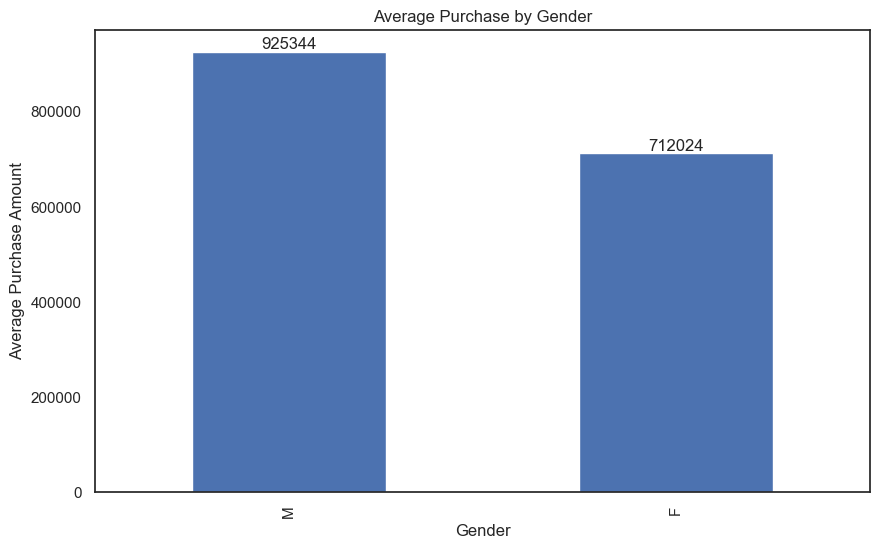

In [40]:
# Compute the mean purchase by gender
mean_purchase_gender = black_friday_sales_aggregated_df.groupby('Gender')['Purchase'].mean().sort_values(ascending=False)

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the data
ax = mean_purchase_gender.plot(kind='bar')

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase by Gender')

# Set the y-axis to display full numbers instead of scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Annotate the bars with the mean values as integers
for container in ax.containers:
    ax.bar_label(container, fmt='%d')

# Display the plot
plt.show()

_Bar Chart Analysis_: A bar chart illustrates the average purchase amounts categorized by gender, aiming to reveal potential disparities in purchasing behavior between genders and uncover gender-based preferences and spending habits.

_Gender-based Purchase Insights_:
Men exhibit notably higher average purchase amounts compared to women.
This difference suggests either higher purchase frequency or preference for higher-priced items among men during Black Friday sales.  

_Preprocessing Implications_: Data preprocessing involves grouping data by gender and computing mean purchase amounts for each category. Further analysis may involve exploring additional demographic or behavioral variables to gain a comprehensive understanding of purchase behavior.

_Decision Impact_: Insights from this analysis inform strategic decision-making in areas such as marketing, product development, and customer engagement. Tailoring strategies and product offerings based on gender-specific preferences can improve customer satisfaction and loyalty. Additionally, resource allocation and pricing strategies can be optimized to better cater to the needs of different gender segments.

**_Average Purchase by Marital Status and Gender_**

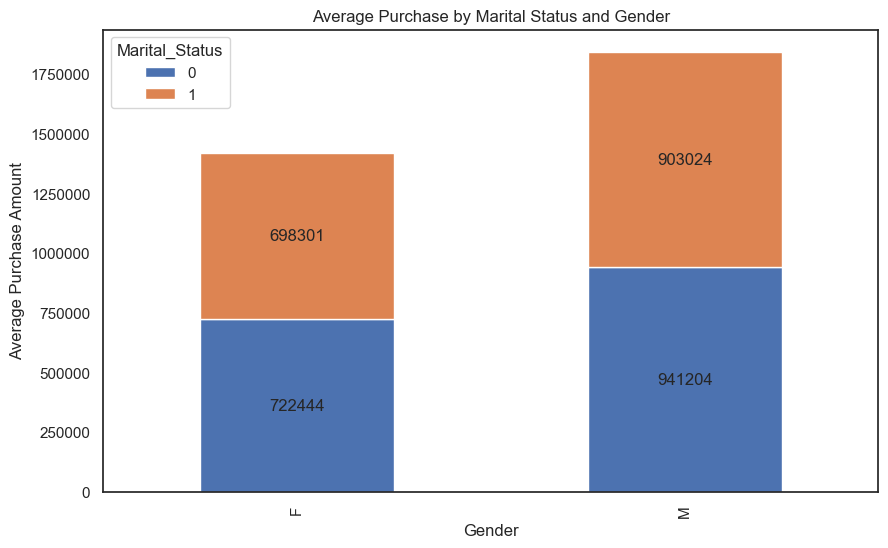

In [41]:
# Let us see how marital status and gender affects Purchase

gender_status_mean = black_friday_sales_aggregated_df.pivot_table(index='Gender', columns='Marital_Status', values='Purchase', aggfunc='mean')
gender_status_mean = black_friday_sales_aggregated_df.pivot_table(index='Gender', columns='Marital_Status', values='Purchase', aggfunc='mean')

# Create the figure and axis
plt.figure(figsize=(10,6))

# Plot the data as a stacked bar chart
ax = gender_status_mean.plot(kind='bar', stacked=True, ax=plt.gca())

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase by Marital Status and Gender')

# Add value labels on top of the bars
for container in ax.containers:
    ax.bar_label(container, label_type='center')

# Set the y-axis to display full numbers instead of scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Display the plot
plt.show()

_Stacked Bar Chart Analysis_: Utilizing a stacked bar chart, average purchase amounts are depicted based on gender and marital status, aiming to unveil consumer spending patterns influenced by these demographic factors.

_Gender and Marital Status Influence_: Marital status notably impacts mean purchasing amounts, with differences observed between married and unmarried individuals. Previous two-way ANOVA analysis revealed an interaction between gender and marital status, indicating nuanced variations in purchasing behavior across demographic groups.  

_Preprocessing Implications_: Preprocessing involves creating a pivot table to aggregate purchase data by gender and marital status, facilitating further analysis. Feature selection may prioritize demographic variables like gender and marital status in predictive modeling efforts to understand and predict purchase behavior.

Decision Impact: Insights garnered inform targeted marketing strategies and product offerings tailored to specific demographic segments. Businesses can optimize marketing campaigns, tailor product assortments, and enhance customer engagement initiatives to better align with the preferences and behaviors of different demographic groups.

**_Average Purchase by Age Category_**

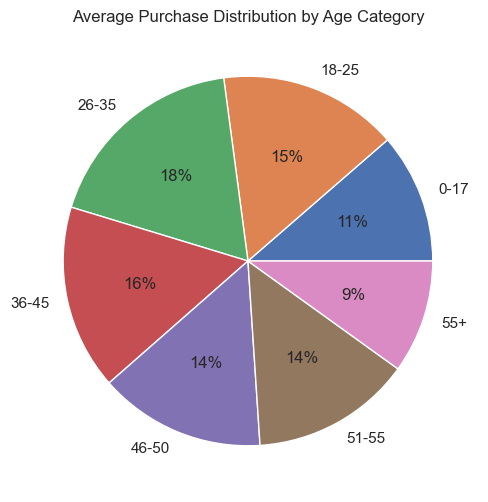

In [42]:
# Let us see how age affects Purchase
age_bins = black_friday_sales_aggregated_df.groupby('Age')['Purchase'].mean()
plt.figure(figsize=(10,6))
plt.pie(age_bins, labels=age_bins.index, autopct=lambda p: f'{int(p)}%')
plt.title('Average Purchase Distribution by Age Category')
plt.show()

_Pie Chart Analysis_: A pie chart visualizes the distribution of average purchase amounts across various age categories, aiming to uncover variations in purchasing behavior among different age groups and understand consumer preferences and spending patterns based on age.

_Age-based Purchase Insights_: Customers aged 26-35 constitute the highest percentage of mean purchases, indicating a significant portion of sales attracted by this demographic.
This suggests a strong presence of youth in sales events, with potential implications for product offerings and marketing strategies targeting this demographic.  

_Preprocessing Implications_: Preprocessing involves grouping data by age and calculating the mean purchase amount for each age category using the groupby method. Feature selection may prioritize age as a significant predictor for purchase behavior in subsequent modeling efforts.

_Decision Impact_: Insights derived from this analysis inform targeted marketing strategies and product development efforts. Businesses can tailor offerings to meet the needs and preferences of specific age groups, optimize marketing budget allocation, and refine product positioning strategies to maximize ROI and enhance customer satisfaction.

**_Mean Purchase by Men Across Age Ranges_**

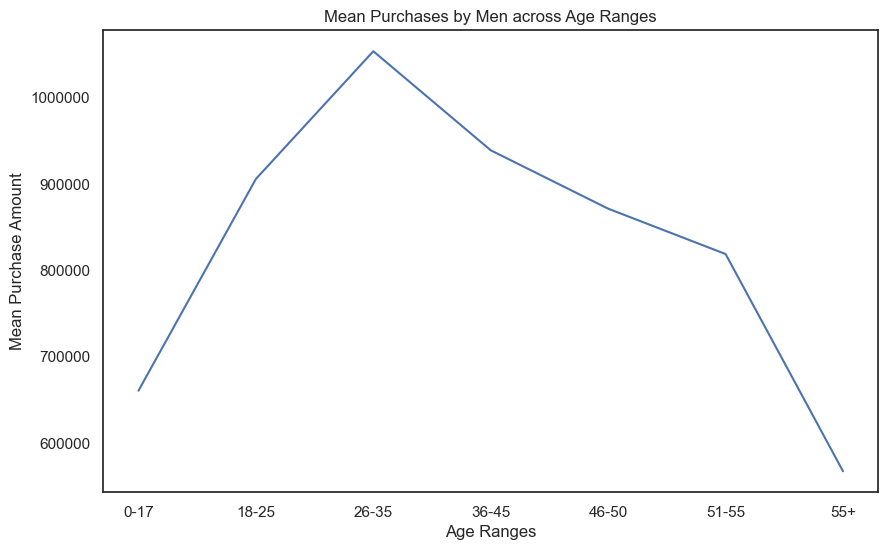

In [43]:
# Filter the data for men
men_data = black_friday_sales_aggregated_df[black_friday_sales_aggregated_df["Gender"] == 'M']

# Compute the mean purchase by age category for men
age_bins_of_men = men_data.groupby('Age')['Purchase'].mean()

# Get the x and y values
x = age_bins_of_men.index
y = age_bins_of_men.values

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the data
plt.plot(x, y)

# Add title and labels
plt.title('Mean Purchases by Men across Age Ranges')
plt.xlabel('Age Ranges')
plt.ylabel('Mean Purchase Amount')

# Set the y-axis to display full numbers instead of scientific notation
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Show the plot
plt.show()

_Data Exploration Type_: Utilizing a line plot, the distribution of mean purchase amounts across various age groups is illustrated, providing insights into purchasing behavior based on age demographics.

_Insights from Data Exploration_: Men aged 26 to 35 exhibit the highest mean purchase amount, aligning with previous findings indicating the same age group's higher mean purchase amount. This analysis aims to identify target products for businesses, with men in this age bracket likely to purchase more gaming gadgets and clothing items.  

_Preprocessing and Feature Selection Considerations_: The initial dataset underwent manipulation via a 'group by' operation on the User ID column to consolidate multiple records of the same user IDs, enhancing clarity. Essential features such as 'Gender' and 'Age' were selected for their valuable demographic insights.  

_Impact of Data Exploration on Decisions_: Insights derived offer valuable direction for tailored marketing strategies and product offerings.
By comprehending purchasing preferences across different demographic segments, businesses can refine marketing campaigns and product assortments to better cater to their target audience, boosting sales and revenue. Furthermore, these findings inform strategic decisions regarding inventory management and resource allocation, optimizing operational efficiency and profitability.

**_Distribution of Mean Purchase across City Category and Age_**

<Figure size 1000x600 with 0 Axes>

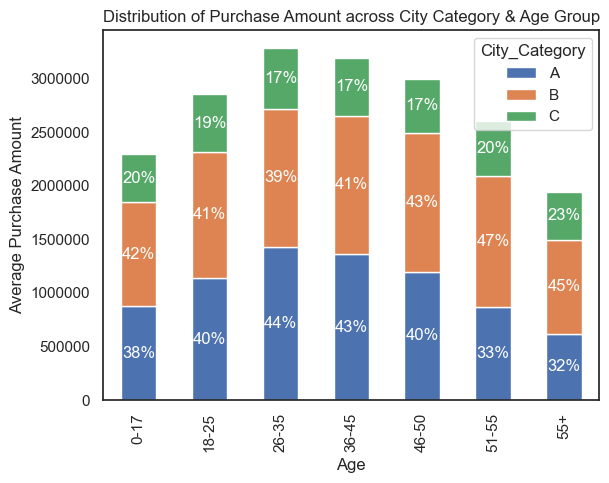

In [44]:
# Compute the pivot table for mean purchase by age and city category
age_city_data = black_friday_sales_aggregated_df.pivot_table(index='Age', columns='City_Category', values='Purchase', aggfunc='mean')

# Calculate the total purchase amount for each age group
age_total_purchase = age_city_data.sum(axis=1)

# Calculate the percentage of purchase for each city category in each age group
age_city_percentage = (age_city_data.div(age_total_purchase, axis=0) * 100).round().astype(int)

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the data as a stacked bar chart
ax = age_city_data.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Average Purchase Amount')
plt.title('Distribution of Purchase Amount across City Category & Age Group')

# Set the y-axis to display full numbers instead of scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Annotate the pivot table inside the visualization with percentage values
for i in range(len(age_city_data.index)):
    for j in range(len(age_city_data.columns)):
        plt.text(i, sum(age_city_data.iloc[i, :j+1]) - age_city_data.iloc[i, j] / 2, f'{age_city_percentage.iloc[i, j]}%', ha='center', va='center', color='white')

# Show the plot
plt.show()

_Data Exploration Approach_: A stacked bar chart is generated to explore mean purchase amounts across different age groups and city categories, shedding light on purchasing behavior based on age demographics and city location.

_Insights from Data Exploration_: Disparities in mean purchase amounts are evident across age groups and city categories. The 26-35 age group consistently exhibits the highest average purchase amount across all city categories, confirming previous observations. Variations in purchasing patterns based on city category suggest implications for targeted marketing and product offerings.  

_Preprocessing and Feature Selection_: Preprocessing tasks include creating a pivot table to aggregate purchase data by age and city category, facilitating a clearer analysis. Feature selection prioritizes demographic variables like age and city category, crucial for understanding purchase patterns and tailoring marketing strategies.  

_Impact on Decision-making_: Insights obtained can inform strategic decisions regarding marketing campaigns, product assortments, and resource allocation. Tailoring offerings to specific demographic segments and geographic locales can enhance sales and revenue growth. Additionally, these findings guide decisions on inventory management and distribution strategies, optimizing operational efficiency and profitability.

**_Average Purchase across City Cateogry_** 

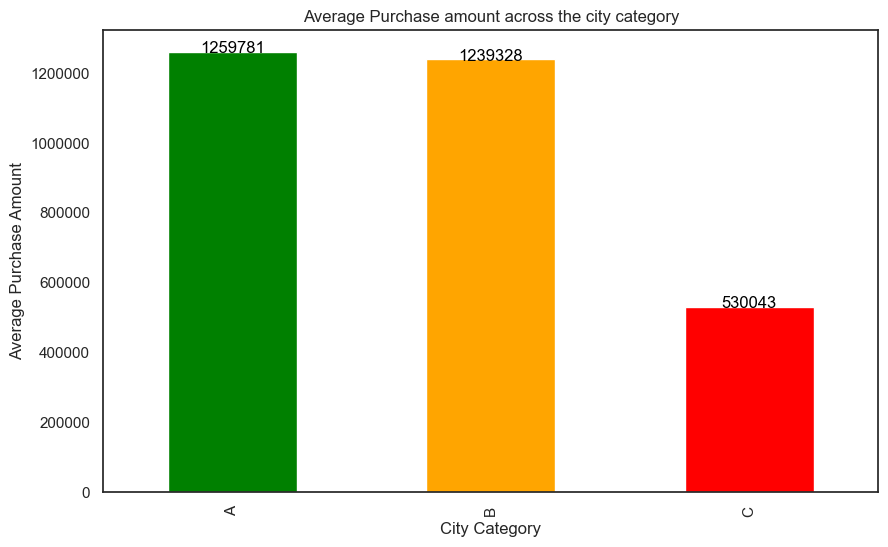

In [45]:
# Compute the mean purchase by city category
city_cat = black_friday_sales_aggregated_df.groupby('City_Category')['Purchase'].mean()

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the data
ax = city_cat.plot(kind='bar', color=['green', 'orange', 'red'])

# Add labels and title
plt.xlabel('City Category')
plt.ylabel('Average Purchase Amount')
plt.title('Average Purchase amount across the city category')

# Set the y-axis to display full numbers instead of scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Annotate the pivot table inside the bars as integers
for i, v in enumerate(city_cat):
    ax.text(i, v + 10000, f'{int(v)}', ha='center', va='center', color='black')

# Show the plot
plt.show()

_Data Exploration Approach_: A bar chart is employed to explore mean purchase amounts across different city categories, providing insights into purchasing behavior based on city location.

_Insights from Data Exploration_: Disparities in mean purchase amounts are observed across various city categories. Purchases are highest in City Category A, followed by City Category B, and then City Category C. This suggests potential variations in purchasing power or preferences among residents in different city categories, warranting tailored marketing strategies.  

_Preprocessing and Feature Selection_: The code executes a groupby operation to compute the mean purchase amount for each city category. Preprocessing involves aggregating purchase data by city category, setting the stage for analyzing purchasing behavior across diverse geographic locations. Feature selection prioritizes the 'City_Category' variable, essential for understanding how city choice influences purchase behavior.  

_Impact on Decision-making_: Insights obtained can inform strategic decisions regarding targeted marketing and product offerings based on city categories. Customizing marketing campaigns and product assortments can better align with the needs and preferences of customers in each location. Additionally, these findings guide decisions on resource allocation and expansion strategies to capitalize on opportunities in high-potential city categories.

**_Average Purchase across City Category and Duration of Stay_**

<Figure size 1000x600 with 0 Axes>

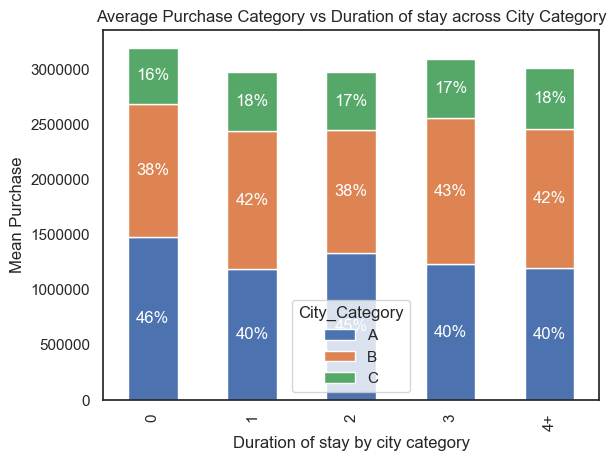

In [46]:
# Compute the pivot table for mean purchase by duration of stay and city category
stay_in_city = black_friday_sales_aggregated_df.pivot_table(index='Stay_In_Current_City_Years', columns='City_Category', values='Purchase', aggfunc='mean')

# Calculate the total purchase amount for each duration of stay
stay_total_purchase = stay_in_city.sum(axis=1)

# Calculate the percentage of purchase for each city category in each duration of stay
stay_city_percentage = (stay_in_city.div(stay_total_purchase, axis=0) * 100).round().astype(int)

# Create the figure and axis
plt.figure(figsize=(10, 6))

# Plot the data as a stacked bar chart
ax = stay_in_city.plot(kind='bar', stacked=True)

# Add labels and title
plt.xlabel('Duration of stay by city category')
plt.ylabel('Mean Purchase')
plt.title('Average Purchase Category vs Duration of stay across City Category')

# Set the y-axis to display full numbers instead of scientific notation
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=False))
ax.ticklabel_format(style='plain', axis='y')

# Annotate the pivot table inside the bars as integer percentage values
for i in range(len(stay_in_city.index)):
    for j in range(len(stay_in_city.columns)):
        plt.text(i, sum(stay_in_city.iloc[i, :j+1]) - stay_in_city.iloc[i, j] / 2, f'{stay_city_percentage.iloc[i, j]}%', ha='center', va='center', color='white')

# Show the plot
plt.show()

_Data Exploration Approach_: Utilizing a stacked bar chart, the code investigates mean purchase amounts across different durations of stay and city categories, providing insights into purchasing behavior based on both factors.

_Insights from Data Exploration_: Disparities in mean purchase amounts are elucidated across various durations of stay and city categories. Patterns in purchasing behavior are unveiled, with short-term residents showing higher-value purchases. Differences in consumer preferences or socioeconomic factors across city categories are indicated.  

_Preprocessing and Feature Selection_: Preprocessing involves constructing a pivot table to aggregate purchase data, facilitating clearer analysis across demographic and geographic segments. Feature selection prioritizes variables such as 'Stay_In_Current_City_Years' and 'City_Category' to understand their influence on purchase behavior.  

_Impact on Decision-making_: Insights guide strategic decisions regarding targeted marketing, product offerings, and customer retention strategies Customization of marketing campaigns and loyalty programs can better cater to customer needs in each segment. These findings inform decisions on expansion plans and resource allocation to maximize profitability in specific markets.

**_Mean Purchase by Occupation_**

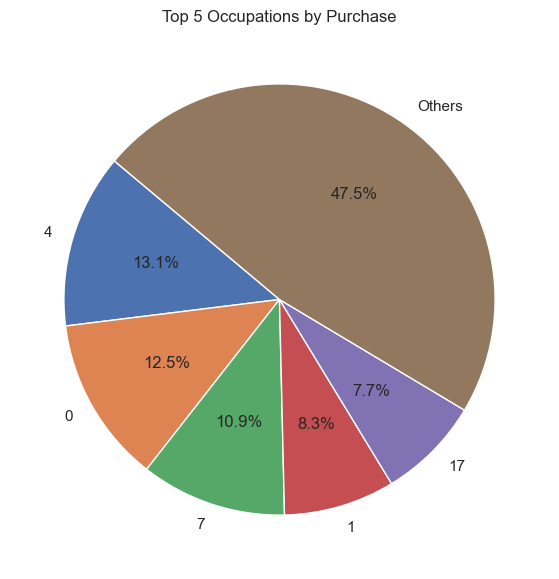

In [47]:
# Aggregate purchase by occupation
occupation_purchase = black_friday_dataset.groupby('Occupation')['Purchase'].sum().reset_index()

# Sort by purchase amount and get top 5 occupations
top_5_occupations = occupation_purchase.sort_values(by='Purchase', ascending=False).head(5)

# Label the rest as 'Others'
top_5_occupations.loc[len(top_5_occupations)] = ['Others', occupation_purchase[~occupation_purchase['Occupation'].isin(top_5_occupations['Occupation'])]['Purchase'].sum()]

# Plotting the pie chart
plt.figure(figsize=(10, 7))
plt.pie(top_5_occupations['Purchase'], labels=top_5_occupations['Occupation'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Occupations by Purchase')
plt.show()

_Data Exploration Approach_: The code analyzes purchase behavior across different occupations, utilizing a pie chart to visualize purchase amounts among the top 5 occupations and aggregating the remaining occupations as 'Others'.

_Insights from Data Exploration_: The pie chart highlights purchasing patterns of various occupations, focusing on the top 5 occupations contributing the most to overall sales. Simplifying visualization by grouping remaining occupations as 'Others' provides a clear depiction of collective purchasing power among smaller segments.  

_Preprocessing and Feature Selection_: Preprocessing involves grouping the dataset by occupation and aggregating purchase amounts for analysis Feature selection emphasizes the 'Occupation' variable, crucial for segmenting data and understanding purchasing behavior across diverse occupational categories.  

_Impact on Decision-making_: Insights inform targeted marketing strategies and product offerings tailored to specific occupational groups Optimization of promotional efforts and product recommendations can align with preferences and purchasing power of different occupations Understanding purchasing behavior aids in inventory management and resource allocation, maximizing revenue during Black Friday sales events.

**_Mean Purchase by Occupation and Duration of stay_**

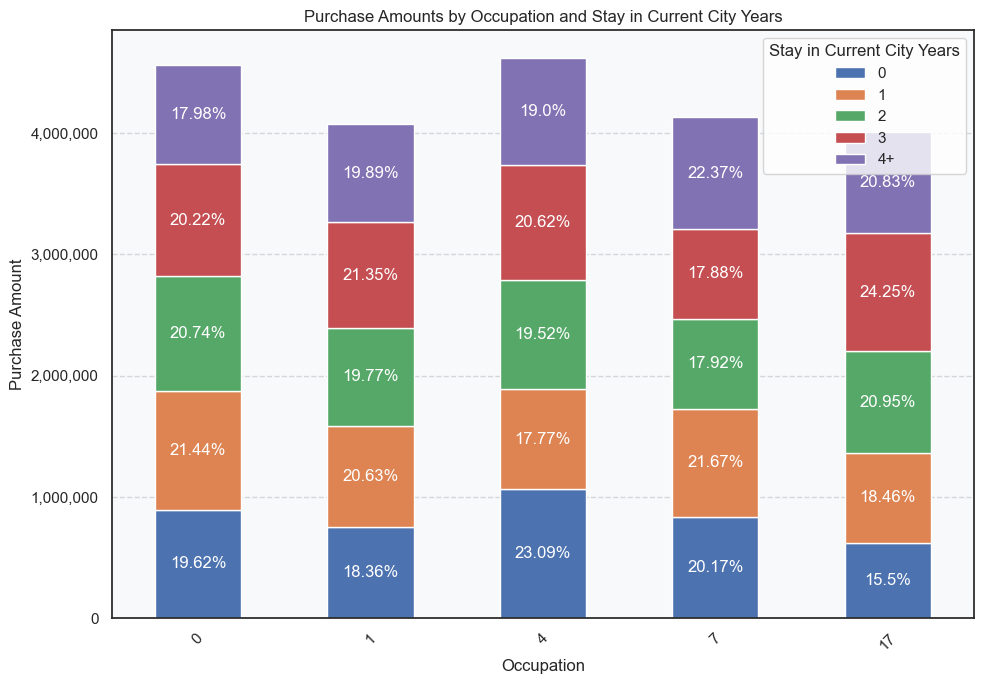

In [48]:
# Function to format y-axis tick labels to display numbers
def format_yticks(value, _):
    return "{:,.0f}".format(value)

occupation_purchase = black_friday_sales_aggregated_df.groupby('Occupation')['Purchase'].sum().reset_index()
top_5_occupations = occupation_purchase.sort_values(by='Purchase', ascending=False).head(5)

top_5_data = black_friday_sales_aggregated_df[black_friday_sales_aggregated_df['Occupation'].isin(top_5_occupations['Occupation'])]
top_5_occupation_duration_table = top_5_data.pivot_table(index='Occupation', columns='Stay_In_Current_City_Years', values='Purchase', aggfunc='mean')

# Calculate mean percentages for each occupation and stay in the current city years combination
mean_percentages = (top_5_occupation_duration_table.div(top_5_occupation_duration_table.sum(axis=1), axis=0) * 100).round(2)

plt.figure(figsize=(10, 7))
ax = plt.subplot(111)  
top_5_occupation_duration_table.plot(kind='bar', stacked=True, ax=ax)

ax.set_facecolor('#f8f9fa')  
ax.yaxis.grid(True, linestyle='--', color='#adb5bd', alpha=0.5)  

plt.title('Purchase Amounts by Occupation and Stay in Current City Years')
plt.xlabel('Occupation')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)

# Set y-axis tick formatter to display numbers
ax.yaxis.set_major_formatter(plt.FuncFormatter(format_yticks))

# Display mean percentages on the stacked bar chart
for i, occupation in enumerate(top_5_occupation_duration_table.index):
    for j, stay_duration in enumerate(top_5_occupation_duration_table.columns):
        plt.text(i, top_5_occupation_duration_table.iloc[i, :j+1].sum() - top_5_occupation_duration_table.iloc[i, j] / 2, 
                 str(mean_percentages.loc[occupation, stay_duration]) + "%", ha='center', va='center', color='white')

plt.legend(title='Stay in Current City Years')
plt.tight_layout()
plt.show()

_Data Exploration Overview_: The code analyzes purchase behavior across occupations using a stacked bar chart, illustrating purchase amounts based on both occupation and duration of stay in the current city.

_Insights_: Highest mean purchase observed for Occupation-4. Customers staying for a year tend to make more purchases, possibly due to settling down.  

_Preprocessing and Features_: Preprocessing involves aggregating purchase amounts by occupation and selecting top 5 occupations. Feature selection includes 'Occupation' and 'Stay_In_Current_City_Years' for segmentation.  

_Impact on Decisions_:
- Informs decisions on marketing segmentation and product offerings.
- Guides customer engagement strategies and retention initiatives.
- Optimizes sales strategies for Black Friday events, enhancing customer satisfaction.




**_Most Preferred subcategories in Product Category 1_**

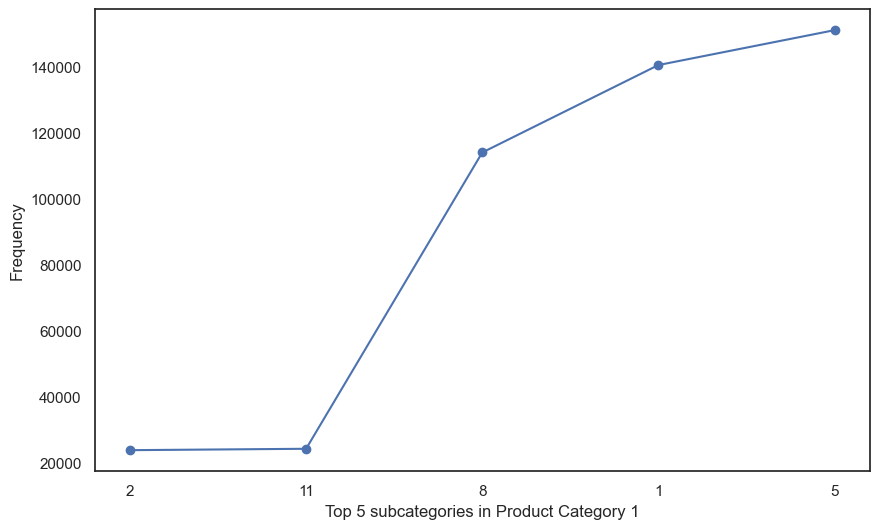

In [49]:
mode_subcategories_product_1 = black_friday_dataset['Product_Category_1'].value_counts()
top_5_mode = mode_subcategories_product_1[:5]
x = top_5_mode.index
y = top_5_mode.values
list_tuple_x_y = list(zip(x,y))
list_tuple_x_y.sort(key = lambda x:x[1])
x1, y1 = [], []
for member in list_tuple_x_y:
    x1.append(member[0])
    y1.append(member[1])

x1 = list(map(str,x1))
  
plt.figure(figsize=(10,6))
plt.xlabel('Top 5 subcategories in Product Category 1')
plt.ylabel('Frequency')
plt.plot(x1,y1, marker='o', linestyle='-')
plt.show()

The code analyzes the frequency of product subcategories within Product Category 1 using a line chart visualization, focusing on the top 5 subcategories.

_Insights_:
- Subcategory 5 exhibits the highest purchase frequency, indicating its popularity.
- Subcategory 2 has the lowest frequency, suggesting fewer purchases compared to others.

_Preprocessing and Features_:
- Preprocessing involves calculating subcategory frequencies and selecting the top 5 subcategories.
- Feature selection includes 'Product_Category_1' for segmenting and analyzing purchase behavior.  

_Impact on Decisions_:
- Guides decisions on product assortment, inventory management, and marketing strategies.
- Helps prioritize inventory stocking and marketing efforts for popular subcategories.
- Informs decisions on product bundling, cross-selling, and promotional campaigns for maximizing revenue during Black Friday events. 

**_What decisions were influenced by data exploration_**

- Feature Selection would be influenced by data exploration. EDA has revealed potential significant predictors. We can avail this information while performing feature selection to back our results.
- Since the data distribution and the dependency between variables were studied, we will take necessary decisions while selecting models for this dataset.

## 3.2.3.3 Feature engineering

**_What feature engineering was performed_**

- The missing values in the columns namely, 'Product_Category_2' and 'Product_Category_3' were filled with zeros.  
- 'User_ID' and 'Product_ID' were dropped.  
- The object type entries in the column 'Gender' were converted to 'int64' type by replacing 'F' with 0 and 'M' with 1.  
- The age ranges in the 'Age' column were encoded by replacing age ranges with integers.  
- The categories in the column 'City_Category' were encoded by replacing the categories with integers.  
- 'Stay_In_Current_City_Years' was also dealt with in the same fashion as the other categorical features.  
- Additionally, the entries of the nature '4+' were reduced to '4'. 
- The categorical columns namely, 'Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', and 'Product_Category_3' were all converted to 'int64' type.  

**_What features were selected for use in machine learning model and why_**

The features selected were namely, ...

Feature Selection was performed using the class SelectKBest from the sci-kit library. The algorithm calculates the chi-sq test statistic between the features and the target variable (categorical). It ranks them in the descending order and picks the specified number of features. In our case, we picked the top 9 features. These features were proven to be significant by the said feature selection model and also aligned with our findings from EDA. As a result, we decided to go ahead with these features for training the model.  

## 3.2.3.4 Preprocessing and the data pipeline

##### Data Preprocessing  

The data preprocessing task is delegated to the second component of our pipeline. The component reads in the dataset from the path contained in the variable 'raw_data'. Kubeflow's syntax doesn't properly process the flow of sequential components when complex data types such as dataframes for instance are passed between them. Consequently, the input is read from 'Input[Dataset]' and the output is written to 'Output[Dataset]'. 

The missing values in the columns, 'Product_Category_2' and 'Product_Category_3' are filled with zeros. Since it is not apparent as to what the entries in the product category columns represent, we have assumed that they represent subcategories. The columns, 'User_ID' and 'Product_ID', are dropped since they are mere identifiers and do not contribute much to understanding the dataset. They can serve as a composite key. In our dataset, each record represents a transaction by a user. It only makes sense to fill the null values with zeros since it would mean that the user hadn't included that subcategory in his basket during that particular transaction. 

##### The Pipeline

**_First Component: Ingestion_**

Each component can be considered a containerized environment that works independently. Therefore, the libraries required for its execution must be installed beforehand. The 'subprocess' class helps us install the requisite libraries. The dataset is stored in a bucket namely, 'bucketdemo2blackfridaysales'. We read the data from it using the class 'storage' from 'google.cloud'. The data is then transformed into a dataframe and then to a 'csv'. It is written to the path specified by Output[Dataset].  

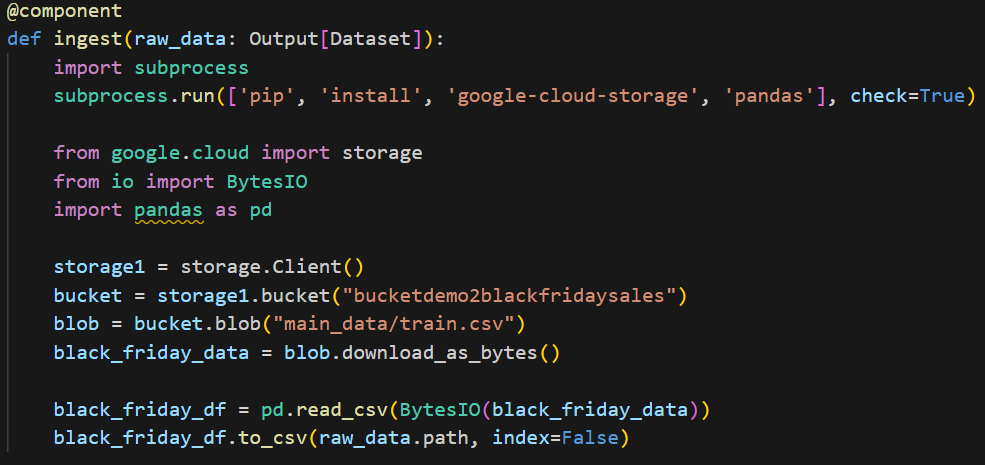



**_Second Component: Preprocessing_**  

The missing values in the columns, 'Product_Category_2' and 'Product_Category_3' are filled with zeros. Since it is not apparent as to what the entries in the product category columns represent, we have assumed that they represent subcategories. The columns, 'User_ID' and 'Product_ID', are dropped since they are mere identifiers and do not contribute much to understanding the dataset. They can serve as a composite key. In our dataset, each record represents a transaction by a user. It only makes sense that we fill the null values with zeros since it would mean that the user hadn't included that subcategory in his basket during that particular transaction. The preprocessed dataframe is converted into a csv and is written to the path specified by the variable 'preprocessed_df'.  

![Preprocessing - component.png](<attachment:Preprocessing - component.png>)



**_Third Component: Feature Engineering_**  

The categorical columns in the dataset are encoded by replacing categories with integers. The transformed dataset is converted to a csv and is written to the path specified by 'engineered_df'.  

![Feature engineering - component.png](<attachment:Feature engineering - component.png>)



**_Fourth Component: Feature Selection_**  

In this component, we recruit the services of another class called 'SelectKBest'. As with the other components, the dataset is read from the output path mentioned by its predecessor. An instance of SelectKBest is created. The parameters are 'score_func' and 'k'. 'k' represents the number of features that the algorithm will pick. The instance 'selector' calculates the chi-sq test statistic between the features and the target variable and then picks the top 'k' features. The indices of those features are retrieved. The names of those features and the target variable is stored in a JSON file for later use. The dataset is sliced and now contains only the features selected by SelectKBest. This dataframe is converted to a csv and written to the path specified by 'finalized_features'.  

![Feature Selection - component.png](<attachment:Feature Selection - component.png>)  



**_Fifth Component: Train-test split_**  

90% of the dataset is used for training and the rest for testing. Out of the 90%, 80% is used for training and the rest for validation. All three dataframes are converted to CSVs and are written to paths mentioned by the variables 'train_df', 'validation_df', and 'test_df'.  

![Train-test - component.png](<attachment:Train-test - component.png>)  



**_Sixth Component_: Hyperparameter Tuning**    

This component utilizes the validation dataset to tune the hyperparameters. The XGBRegressor model is used and the optimal set of hyperparameters are dumped into a JSON file and saved for later use.  

![Hyperparameter tuning - component.png](<attachment:Hyperparameter tuning - component.png>)  



**_Seventh Component: Model Building_**  

This component utilizes the train dataset. The optimal set of hyperparameters are read from the JSON file. As for the model, XGBRegressor is used. The model is exposed to the training dataset. The trained model is dumped into the path specified by the variable 'model_path' in 'joblib' format.  

![Model building - component.png](<attachment:Model building - component.png>)  



**_Eighth Component: Uploading the model to Vertex AI_**  

This component employs the class 'aiplatform' from 'google.cloud'. Here, we containerize the trained model and register it in Vertex AI's Model Registry. It can be accessed when needed and will always act as a perfect launch pad to create an endpoint.  

![Model Registry - component.png](<attachment:Model Registry - component.png>) 


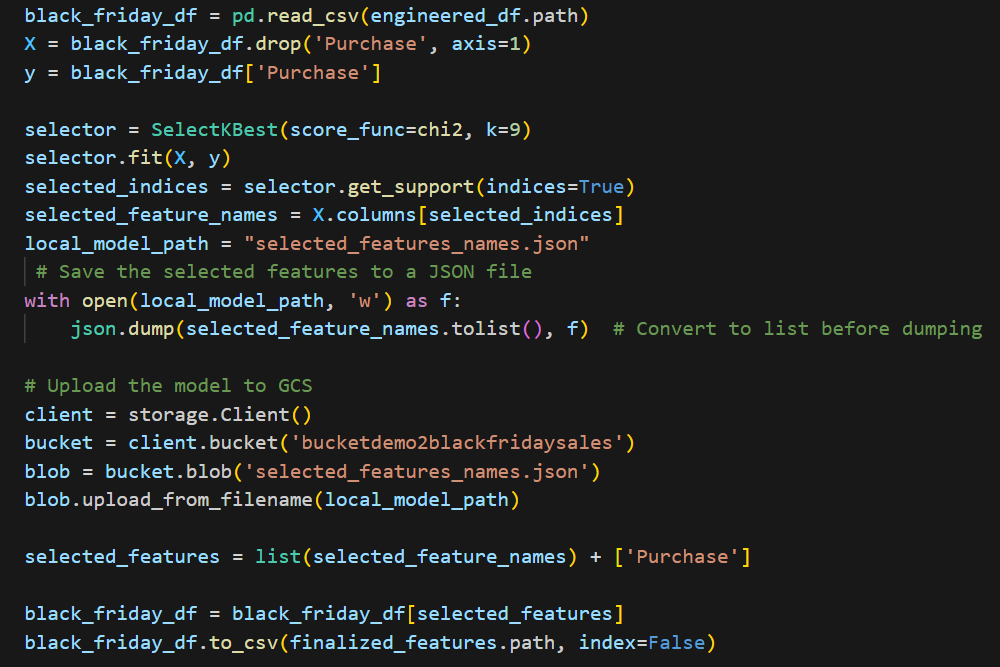
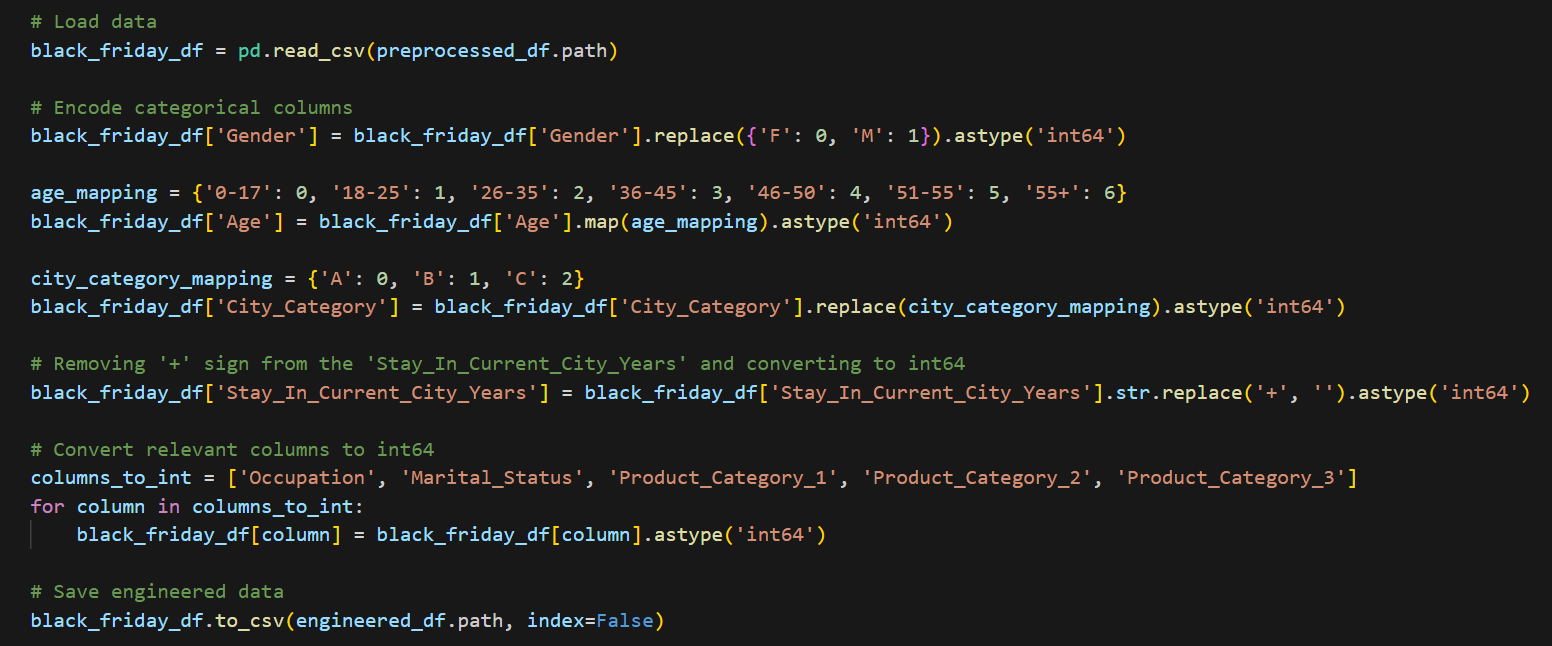
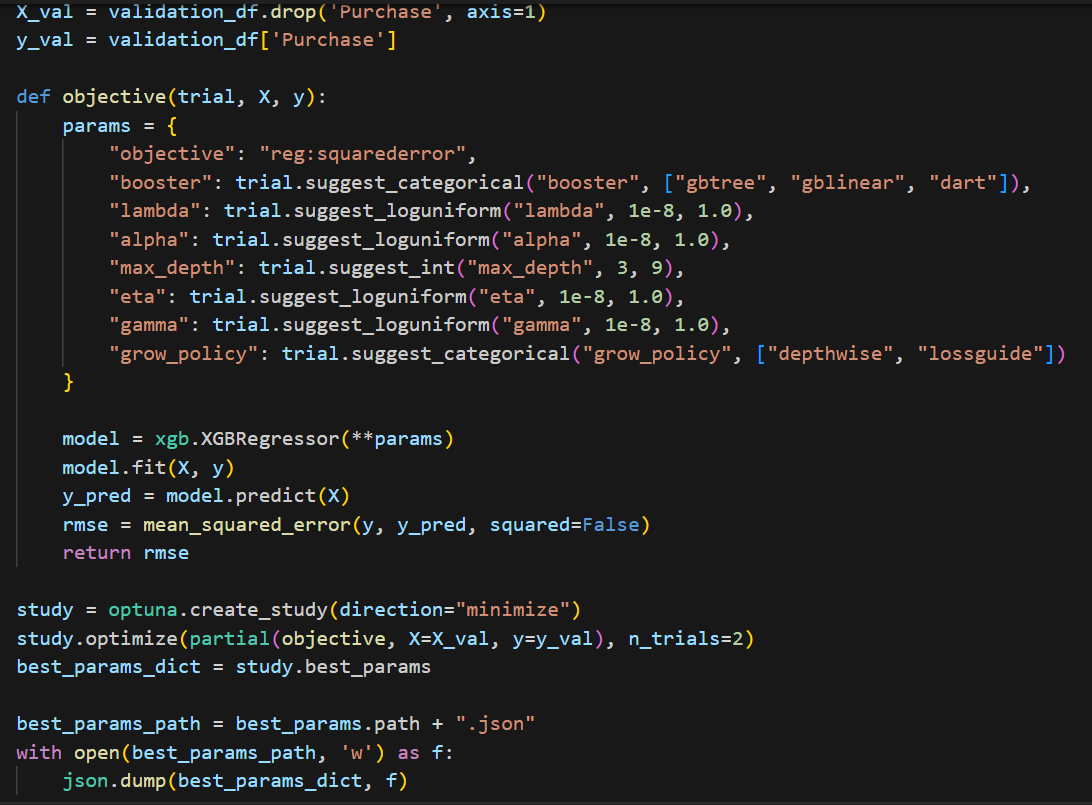
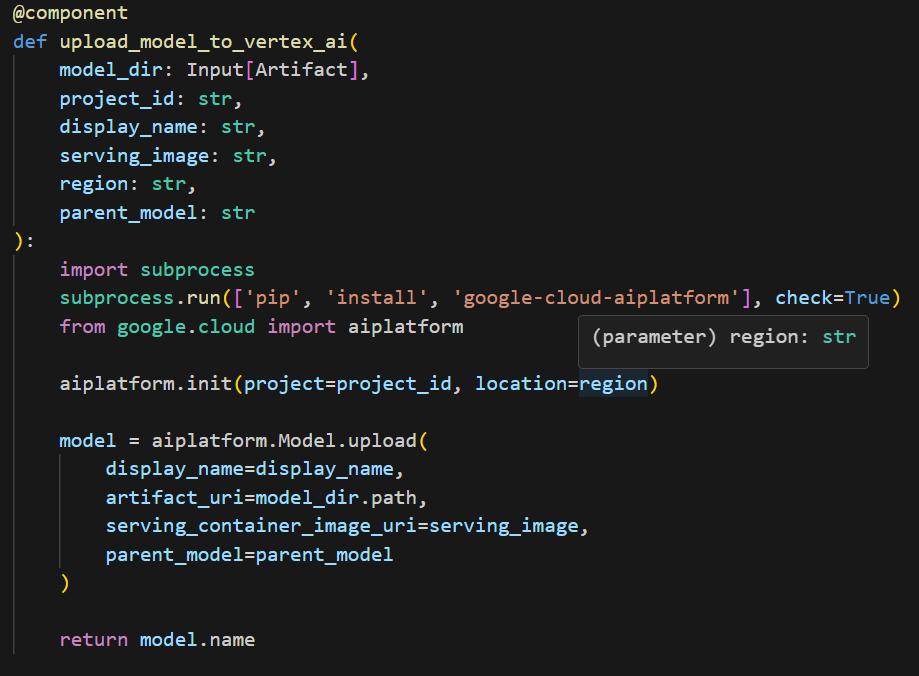
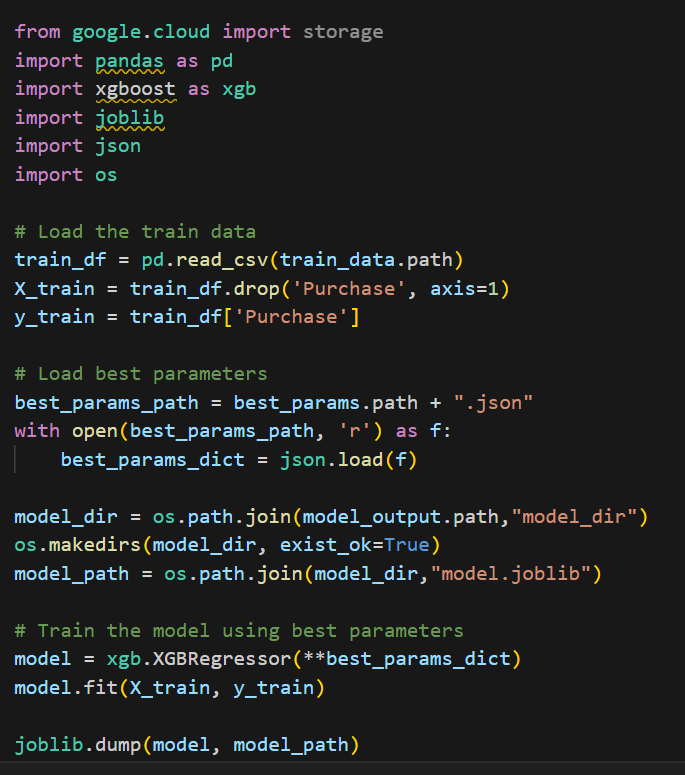
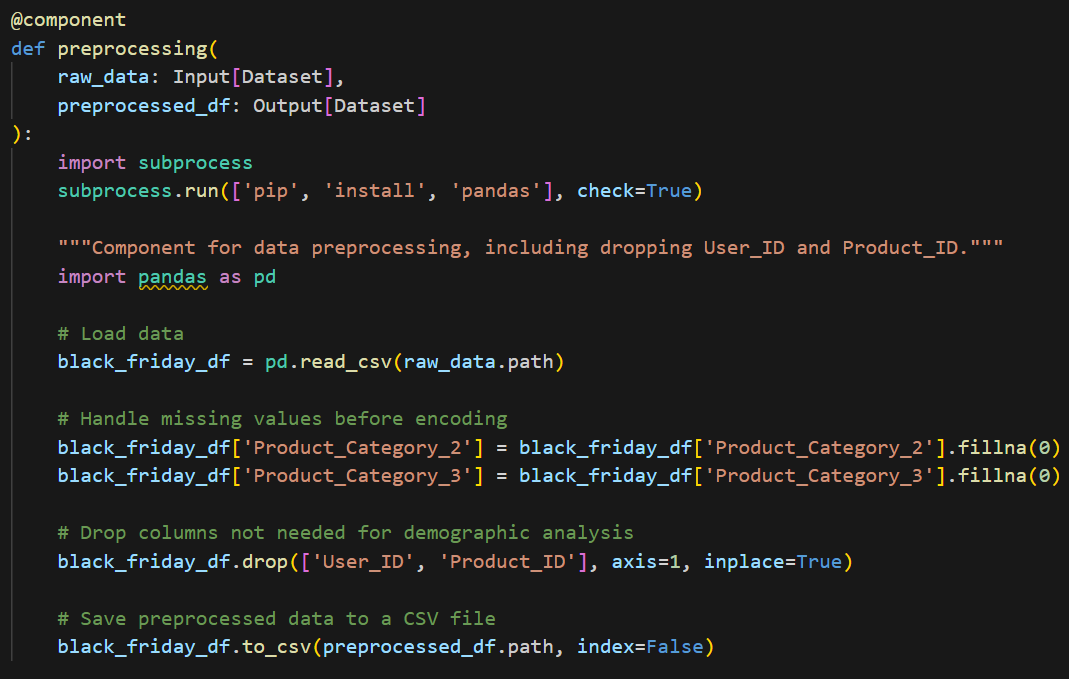
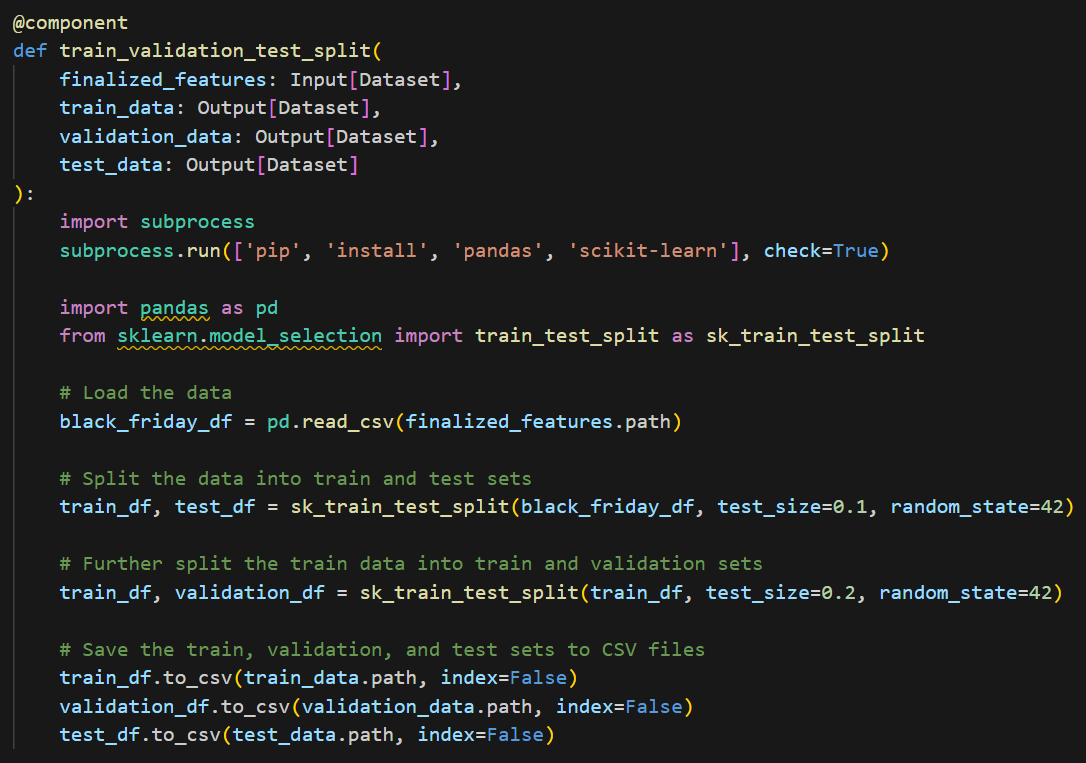

![First set of components.png](<attachment:First set of components.png>)

![Second set.png](<attachment:Second set.png>)  

![Third set.png](<attachment:Third set.png>)  

![Fourth set.png](<attachment:Fourth set.png>)
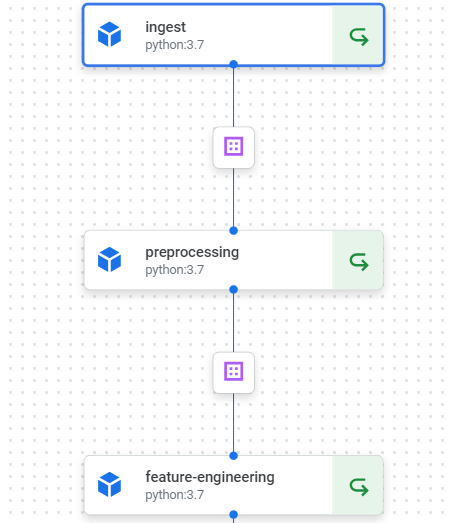
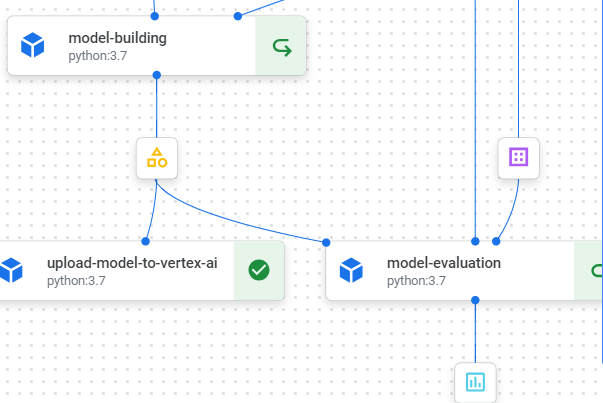
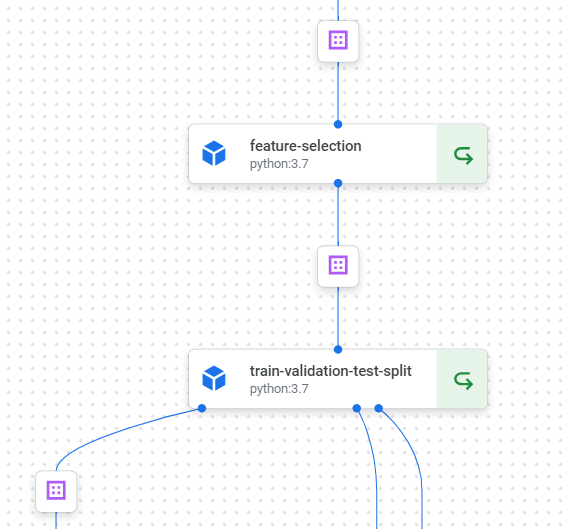
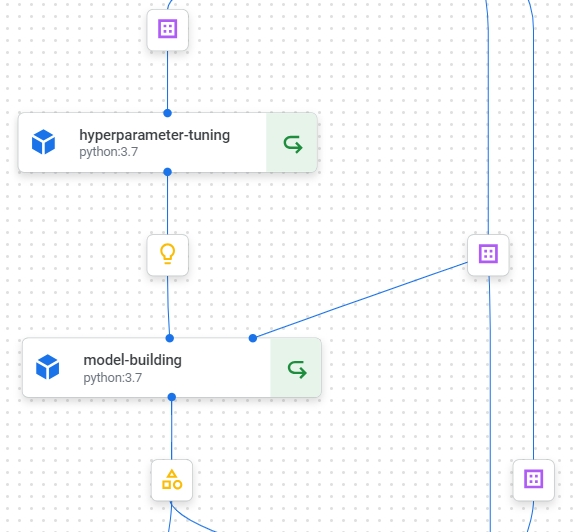

# 3.2.3.5 Machine learning model design(s) and selection


In the Black Friday sales prediction project, the design and selection of the machine learning model are crucial for accurately predicting sales. This phase involved exploring various machine learning models, with a strong emphasis on leveraging ensemble methods and regression techniques to capture the intricate patterns within the sales data.

##### Machine Learning Model Design
Given the complexity and volume of the dataset, along with the requirement to capture intricate patterns within the data, the following models were initially considered:

**_Linear Regression_**:
Used as a baseline model for its simplicity and ease of interpretation. It provided a preliminary understanding of the linear relationships within the data.

**_Random Forest_**:
Evaluated for its ability to handle nonlinear relationships and its robustness against overfitting. This model's capacity to model complex interactions was a key consideration.

**_Lasso Regression_**:
Considered for its ability to perform feature selection by penalizing the absolute size of the regression coefficients, potentially improving model interpretability.

**_Ridge Regression_**:
Evaluated for its effectiveness in dealing with multicollinearity by penalizing the squared size of the regression coefficients.

**_XGBoost_**:
Known for its high performance and efficiency, XGBoost was tested for its advanced handling of bias and variance. Its ability to model complex interactions through gradient boosting made it a strong candidate.

**_Criteria for Model Selection_**
The model selection was guided by multiple criteria, tailored to the needs and constraints of the project:

- _Accuracy and Performance_:
The primary criterion was the model's predictive performance, evaluated using metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).

- _Handling Complex Feature Interactions_:
The model's ability to learn complex and non-linear relationships within the data was essential.

- _Scalability_:
Given the large volume of sales data, the chosen model needed to scale efficiently as new data became available.

- _Operational Viability_:
For practical implementation, the computational efficiency during both training and inference stages was crucial.


##### Final Model Selection and Implementation
After rigorous testing and evaluation, XGBoost emerged as the most effective model, surpassing others in terms of performance and its ability to handle the complexity of the dataset.

**_XGBoost_**:
XGBoost was configured with fine-tuned parameters to optimize its performance. The model was particularly adept at handling the various features of the sales data, such as product category, purchase amount, and customer demographics. Its gradient boosting framework allowed for sequential correction of errors, leading to robust predictive performance.

**_Implementation in the Kubeflow Pipeline_**
The XGBoost model was implemented within the Kubeflow Pipeline, leveraging its robust capabilities for building and deploying machine learning workflows. The pipeline facilitated continuous training and updating of the model with new data, ensuring that the model remains accurate and relevant. This setup is crucial for adapting to new patterns or changes in sales behavior over time.

By selecting XGBoost as the core predictive model, the project ensures high accuracy and the ability to handle the diverse and dynamic nature of Black Friday sales data. The model's architecture is specifically tailored to meet the complex demands of the application, making it a powerful tool for real-time sales prediction and strategic business analysis.

# 3.2.3.6 Machine learning model training and development

For the Black Friday sales prediction project, training and developing the XGBoost model involved detailed steps and configurations using the Kubeflow Pipeline. Here's a concise breakdown of the process based on the provided code:

#### Dataset Sampling and Preparation

**Ingesting Data:**
The `ingest` component handles the downloading of raw data from Google Cloud Storage and saves it as a CSV file. This initial step is crucial for ensuring that the data is readily available for subsequent processing.


**Preprocessing Data:**
The `preprocessing` component involves handling missing values and dropping unnecessary columns. This ensures that the data is clean and free of irrelevant features before further processing.


**Feature Engineering:**
In the `feature_engineering` component, categorical features are encoded, and data types are converted to ensure compatibility with the modeling process.


**Feature Selection:**
The `feature_selection` component uses the SelectKBest method to select the top features relevant to the prediction task, ensuring that the model is trained on the most informative features.


**Train-Validation-Test Split:**
The data is split into training, validation, and test sets to ensure robust model evaluation. This step is managed by the `train_validation_test_split` component.


#### Model Architecture and Setup

**Hyperparameter Tuning:**
The `hyperparameter_tuning` component uses Optuna to find the best hyperparameters for the XGBoost model, optimizing for the lowest RMSE.


**Model Building:**
Using the best parameters identified, the `model_building` component trains the XGBoost model on the training data.



#### Training Execution

**Training Pipeline:**
The training process is managed by the Kubeflow pipeline, which orchestrates the execution of all components. The pipeline ensures that data flows correctly between components and that each step is executed in the correct sequence.


![Artifacts.png]("https://github.com/shivaraj-brillio/Demo2_Black_Friday/blob/main/images/Artifacts.png")


By leveraging the advanced capabilities of Kubeflow Pipeline and careful orchestration of data handling and model training processes, the project successfully developed a robust XGBoost model capable of accurately predicting Black Friday sales based on historical data. This model not only meets the project's accuracy requirements but also scales efficiently with increasing data volumes and complexity.

# 3.2.3.7 Machine learning model evaluation

**Model Evaluation:**
The `model_evaluation` component assesses the model's performance on both the training and test datasets, logging important metrics like RMSE and R2.

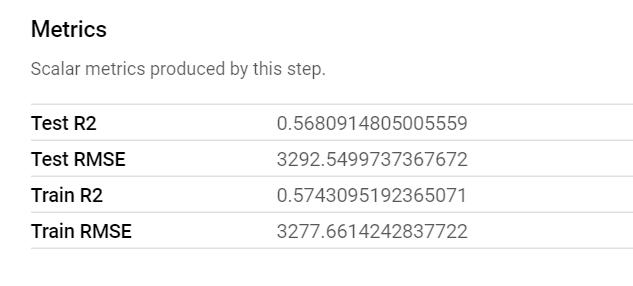